In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import plot_confusion_matrix
from scipy import stats as stat_
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Mounting Google Drive to enable access to any directory on Drive inside the Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#we are navigating to the location where files are located
% cd /content/drive/MyDrive/IDS 575/Final_Project

/content/drive/MyDrive/IDS 575/Final_Project


In [ ]:
#Load the Data
medical_df = pd.read_csv("diabetic_data.csv")

In [ ]:
#Checking the contents of the dataset
medical_df.shape

(101766, 50)

# Dataset Overview

We can see there are 101766 rows and 50 columns

In [ ]:
medical_df.head(10)

encounter_id  patient_nbr             race  gender       age weight  \
0       2278392      8222157        Caucasian  Female    [0-10)      ?   
1        149190     55629189        Caucasian  Female   [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3        500364     82442376        Caucasian    Male   [30-40)      ?   
4         16680     42519267        Caucasian    Male   [40-50)      ?   
5         35754     82637451        Caucasian    Male   [50-60)      ?   
6         55842     84259809        Caucasian    Male   [60-70)      ?   
7         63768    114882984        Caucasian    Male   [70-80)      ?   
8         12522     48330783        Caucasian  Female   [80-90)      ?   
9         15738     63555939        Caucasian  Female  [90-100)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   
5                  2                         1                    2   
6                  3                         1                    2   
7                  1                         1                    7   
8                  2                         1                    4   
9                  3                         3                    4   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   
5                 3  ...          No  Steady                   No   
6                 4  ...          No  Steady                   No   
7                 5  ...          No      No                   No   
8                13  ...          No  Steady                   No   
9                12  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   
5                   No                        No                       No   
6                   No                        No                       No   
7                   No                        No                       No   
8                   No                        No                       No   
9                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  
5                      No      No         Yes        >30  
6                      No      Ch         Yes         NO  
7                      No      No         Yes        >30  
8                      No      Ch         Yes         NO  
9                      No      Ch         Yes         NO  

[10 rows x 50 columns]

In [ ]:
#index dtype and column dtypes
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
medical_df.tail(5)

encounter_id  patient_nbr             race  gender      age weight  \
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
101761                       No                      No      Ch         Yes   
101762                       No                      No      No         Yes   
101763                       No                      No      Ch         Yes   
101764                       No                      No      Ch         Yes   
101765                       No                      No      No          No   

       readmitted  
101761        >30  
101762         NO  
101763         NO  
101764         NO  
101765         NO  

[5 rows x 50 columns]

Missing values in this dataset are represented by ‘?’. We first replace missing values with NaN, and count the missing values.

In [ ]:
#We have missing values in data which ar indicated by ? so we need to replace ? With NAN values

#replace ? with nan
medical_df = medical_df.replace('?', np.nan)

#count missing values
#medical_df.isna().sum()
medical_df.apply(lambda x: sum(x.isnull()),axis=0) 

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
percent_missing = medical_df.isnull().sum() * 100 / len(medical_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

percent_missing
encounter_id                     0.000000
patient_nbr                      0.000000
race                             2.233555
gender                           0.000000
age                              0.000000
weight                          96.858479
admission_type_id                0.000000
discharge_disposition_id         0.000000
admission_source_id              0.000000
time_in_hospital                 0.000000
payer_code                      39.557416
medical_specialty               49.082208
num_lab_procedures               0.000000
num_procedures                   0.000000
num_medications                  0.000000
number_outpatient                0.000000
number_emergency                 0.000000
number_inpatient                 0.000000
diag_1                           0.020636
diag_2                           0.351787
diag_3                           1.398306
number_diagnoses                 0.000000
max_glu_serum                    0.000000
A1Cresult                        0.000000
metformin                        0.000000
repaglinide                      0.000000
nateglinide                      0.000000
chlorpropamide                   0.000000
glimepiride                      0.000000
acetohexamide                    0.000000
glipizide                        0.000000
glyburide                        0.000000
tolbutamide                      0.000000
pioglitazone                     0.000000
rosiglitazone                    0.000000
acarbose                         0.000000
miglitol                         0.000000
troglitazone                     0.000000
tolazamide                       0.000000
examide                          0.000000
citoglipton                      0.000000
insulin                          0.000000
glyburide-metformin              0.000000
glipizide-metformin              0.000000
glimepiride-pioglitazone         0.000000
metformin-rosiglitazone          0.000000
metformin-pioglitazone           0.000000
change                           0.000000
diabetesMed                      0.000000
readmitted                       0.000000

Text(0.5, 1.0, 'Missing value')

<Figure size 1440x576 with 0 Axes>

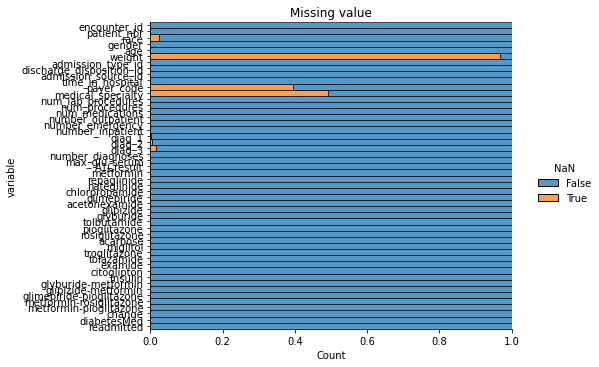

In [ ]:
#plot missing values in the dataset

plt.figure(figsize=(20,8))
sns.displot(
    data = medical_df.isna().melt(value_name="NaN"),
    y="variable",
    hue="NaN",
    multiple="fill",
    aspect=1.50
)

plt.title("Missing value")

### Our Target Variable: Readmitted's class distribution
- Evelyn: I noticed besides the result of readmitted or not, the target variable also include detail info about whether the patient gets readmitted to the hospital within 30 days or not. (>30, <30) 
  - Can we train 2 models in different level? The first is to predict Readimit or not, and the second one will be if they are predicted to readmit, how long will it takes for them to readmit? OR just redefine the classes, NO as 0, <30 as 1, and >30 as 0?

### Analyzing the distrbution of the target variable i.e readmitted

In [ ]:
medical_df['readmitted'].unique

<bound method Series.unique of 0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object>

In [ ]:
#Looking at the target label distribution
medical_df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

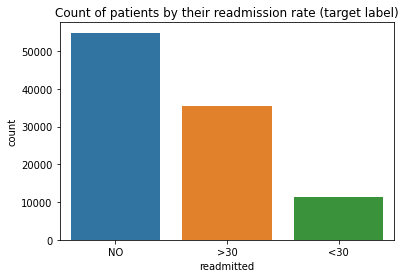

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visualizing the target label distribution using a bar chart
s1=sns.countplot(x='readmitted', data=medical_df,order=medical_df['readmitted'].value_counts(ascending=False).index)
plt.title('Count of patients by their readmission rate (target label)')
plt.show()
plt.savefig('count plot')

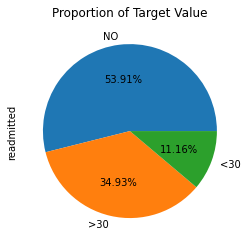

In [ ]:
# Calculating the proportion of patients  fall under each category(label)
# Pie chart
medical_df.readmitted.value_counts().plot.pie(autopct = "%.2f%%")
plt.title("Proportion of Target Value")
plt.show()
# The pie chart depicts the patients who were readmitted to hospital in < 30 days, >  30 days and the patients who were not readmitted to hospital

In [ ]:
# summarizing the statistics for all the features

for col in medical_df.columns:
    print('Feature/Attribute: ', col)
    print(medical_df[col].describe())
    print('**********************************************************')
    

Feature/Attribute:  encounter_id
count    1.017660e+05
mean     1.652016e+08
std      1.026403e+08
min      1.252200e+04
25%      8.496119e+07
50%      1.523890e+08
75%      2.302709e+08
max      4.438672e+08
Name: encounter_id, dtype: float64
**********************************************************
Feature/Attribute:  patient_nbr
count    1.017660e+05
mean     5.433040e+07
std      3.869636e+07
min      1.350000e+02
25%      2.341322e+07
50%      4.550514e+07
75%      8.754595e+07
max      1.895026e+08
Name: patient_nbr, dtype: float64
**********************************************************
Feature/Attribute:  race
count         99493
unique            5
top       Caucasian
freq          76099
Name: race, dtype: object
**********************************************************
Feature/Attribute:  gender
count     101766
unique         3
top       Female
freq       54708
Name: gender, dtype: object
**********************************************************
Feature/Attribute:  age


### Checking the distribution of different variables

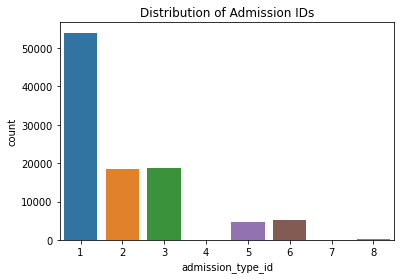

Distribution of ID's
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


In [ ]:
# Adimission Type
sns.countplot(x = "admission_type_id", data = medical_df)
plt.title("Distribution of Admission IDs")
plt.show()

print("Distribution of ID's")
print(medical_df.admission_type_id.value_counts())

# Emergency : 1
# Urgent : 2
# Elective : 3
# Newborn : 4
# Not Available : 5
# NULL : 6
# Trauma Center : 7
# Not Mapped : 8

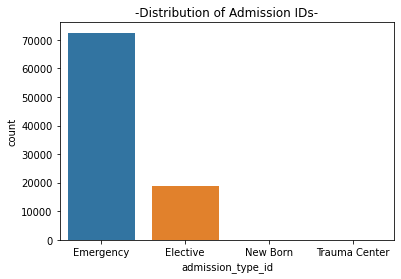

-Distribution of ID's-
Emergency        72470
Elective         18869
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64


In [ ]:
# Refined Adimission Type
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

medical_df.admission_type_id = medical_df.admission_type_id.replace(mapped)

sns.countplot(x = "admission_type_id", data = medical_df)
plt.title("-Distribution of Admission IDs-")
plt.show()

print("-Distribution of ID's-")
print(medical_df.admission_type_id.value_counts())

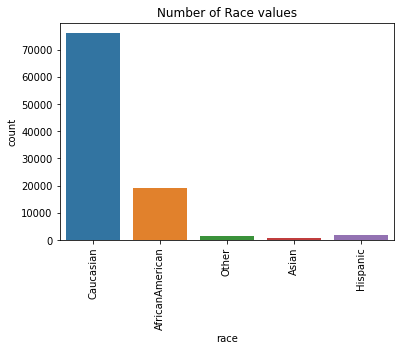

Proportion of Race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: race, dtype: float64


In [ ]:
# Race
sns.countplot(x=medical_df.race, data = medical_df)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(medical_df.race.value_counts(normalize = True)*100)

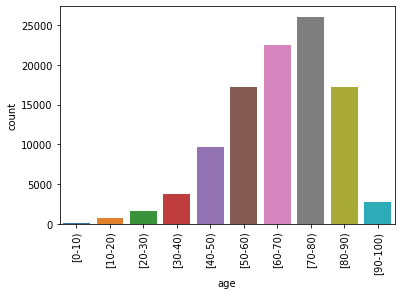

In [ ]:
# Age
sns.countplot(x="age", data = medical_df)
plt.xticks(rotation = 90)
plt.show()

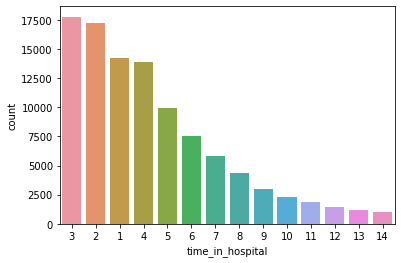

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64


In [ ]:
# Time spent in hospital
sns.countplot(x="time_in_hospital", data = medical_df,
              order = medical_df.time_in_hospital.value_counts().index)
plt.show()

print(medical_df.time_in_hospital.value_counts())

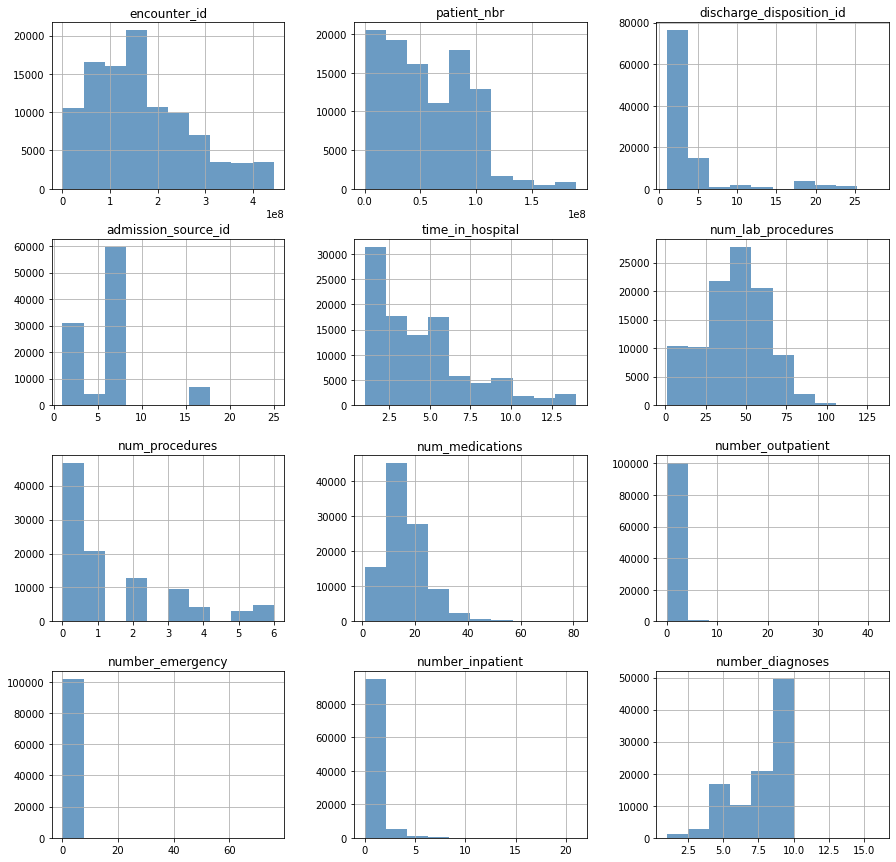

In [ ]:
#checking skewness 
medical_df.hist(rwidth=None, log=False, figsize=(15,15), color='steelblue', alpha=0.8, label='Value', linewidth=2, stacked=False)
plt.show()

In [ ]:
#Checking other properties of the data
#Checking the skewness value
numF = medical_df.dtypes[medical_df.dtypes!='object']
skewF = medical_df.skew().sort_values(ascending = False)
skewF

number_emergency            22.855582
number_outpatient            8.832959
number_inpatient             3.614139
discharge_disposition_id     2.563067
num_medications              1.326672
num_procedures               1.316415
time_in_hospital             1.133999
admission_source_id          1.029935
encounter_id                 0.699142
patient_nbr                  0.471281
num_lab_procedures          -0.236544
number_diagnoses            -0.876746
dtype: float64

### Correlations between Variables and Readmmission

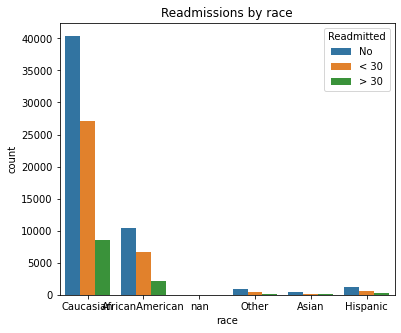

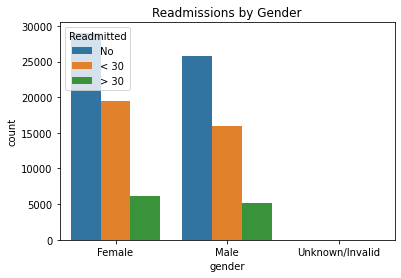

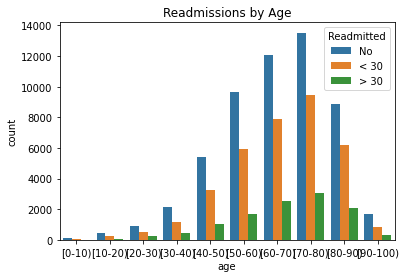

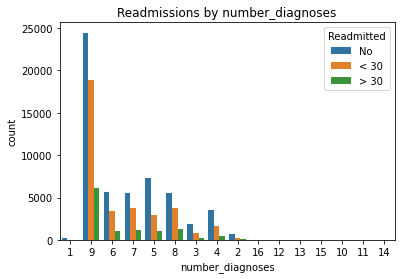

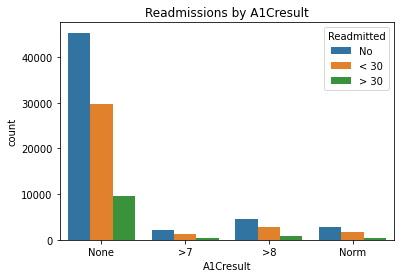

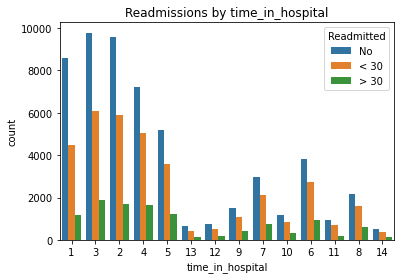

In [ ]:
#Exploring the data 
plt.figure(figsize=(6,5))


race_plt = sns.countplot(x = 'race', hue = 'readmitted', data = medical_df, order = medical_df.race.unique().tolist()) 
race_plt.legend(title = 'Readmitted', labels = ('No', '< 30','> 30'))
race_plt.axes.set_title('Readmissions by race')
plt.show();

gender_plt = sns.countplot(x = 'gender', hue = 'readmitted', data = medical_df, order = medical_df.gender.unique().tolist()) 
gender_plt.legend(title = 'Readmitted', labels = ('No', '< 30','> 30'))
gender_plt.axes.set_title('Readmissions by Gender')
plt.show();

age_plt = sns.countplot(x = 'age', hue = 'readmitted', data = medical_df, order = medical_df.age.unique().tolist()) 
age_plt.legend(title = 'Readmitted', labels = ('No', '< 30','> 30'))
age_plt.axes.set_title('Readmissions by Age')
plt.show();


diag_plt = sns.countplot(x = 'number_diagnoses', hue = 'readmitted', data = medical_df, order = medical_df.number_diagnoses.unique().tolist()) 
diag_plt.legend(title = 'Readmitted', labels = ('No', '< 30','> 30'))
diag_plt.axes.set_title('Readmissions by number_diagnoses')
plt.show();

A1_plt = sns.countplot(x = 'A1Cresult', hue = 'readmitted', data = medical_df, order = medical_df.A1Cresult.unique().tolist()) 
A1_plt.legend(title = 'Readmitted', labels = ('No', '< 30','> 30'))
A1_plt.axes.set_title('Readmissions by A1Cresult')
plt.show();

time_plt = sns.countplot(x = 'time_in_hospital', hue = 'readmitted', data = medical_df, order = medical_df.time_in_hospital.unique().tolist()) 
time_plt.legend(title = 'Readmitted', labels = ('No', '< 30','> 30'))
time_plt.axes.set_title('Readmissions by time_in_hospital')
plt.show();


### Data Preprocessing- Binary Classification

In [ ]:
#code "No" readmission as 0, readmission within 30 days as 1, readmission after 30 days as 1
medical_df['readmitted'] = medical_df['readmitted'].map({'NO': 0, '<30': 1, '>30': 2})

In [ ]:
medical_df['readmitted'].unique()

array([0, 2, 1])

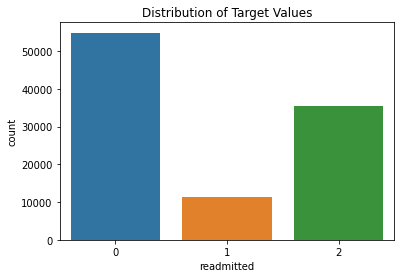

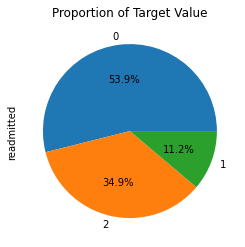

In [ ]:
#plot the distribution of class 1 and 0
sns.countplot(x = "readmitted", data = medical_df)
plt.title("Distribution of Target Values")
plt.show()
medical_df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

In [ ]:
medical_df['readmitted'].value_counts()

0    54864
2    35545
1    11357
Name: readmitted, dtype: int64

#### Corelations between variables and Readmmission

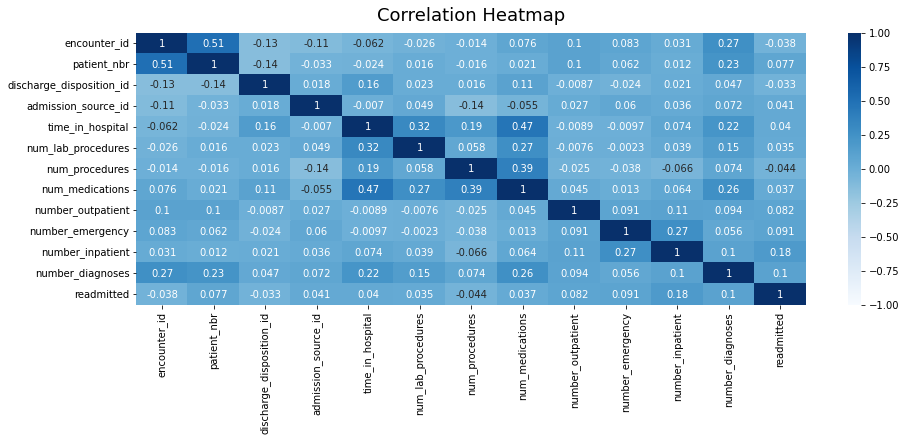

In [ ]:
#visualizing the correlation between different variables
plt.figure(figsize=(15, 5))
heatmap = sns.heatmap(medical_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
#Measure the correlation
corr_values = medical_df.corr()
corr_values

encounter_id  patient_nbr  discharge_disposition_id  \
encounter_id                  1.000000     0.512028                 -0.132876   
patient_nbr                   0.512028     1.000000                 -0.136814   
discharge_disposition_id     -0.132876    -0.136814                  1.000000   
admission_source_id          -0.112402    -0.032568                  0.018193   
time_in_hospital             -0.062221    -0.024092                  0.162748   
num_lab_procedures           -0.026062     0.015946                  0.023415   
num_procedures               -0.014225    -0.015570                  0.015921   
num_medications               0.076113     0.020665                  0.108753   
number_outpatient             0.103756     0.103379                 -0.008715   
number_emergency              0.082803     0.062352                 -0.024471   
number_inpatient              0.030962     0.012480                  0.020787   
number_diagnoses              0.265149     0.226847                  0.046891   
readmitted                   -0.038416     0.077315                 -0.033281   

                          admission_source_id  time_in_hospital  \
encounter_id                        -0.112402         -0.062221   
patient_nbr                         -0.032568         -0.024092   
discharge_disposition_id             0.018193          0.162748   
admission_source_id                  1.000000         -0.006965   
time_in_hospital                    -0.006965          1.000000   
num_lab_procedures                   0.048885          0.318450   
num_procedures                      -0.135400          0.191472   
num_medications                     -0.054533          0.466135   
number_outpatient                    0.027244         -0.008916   
number_emergency                     0.059892         -0.009681   
number_inpatient                     0.036314          0.073623   
number_diagnoses                     0.072114          0.220186   
readmitted                           0.041193          0.040309   

                          num_lab_procedures  num_procedures  num_medications  \
encounter_id                       -0.026062       -0.014225         0.076113   
patient_nbr                         0.015946       -0.015570         0.020665   
discharge_disposition_id            0.023415        0.015921         0.108753   
admission_source_id                 0.048885       -0.135400        -0.054533   
time_in_hospital                    0.318450        0.191472         0.466135   
num_lab_procedures                  1.000000        0.058066         0.268161   
num_procedures                      0.058066        1.000000         0.385767   
num_medications                     0.268161        0.385767         1.000000   
number_outpatient                  -0.007602       -0.024819         0.045197   
number_emergency                   -0.002279       -0.038179         0.013180   
number_inpatient                    0.039231       -0.066236         0.064194   
number_diagnoses                    0.152773        0.073734         0.261526   
readmitted                          0.035441       -0.044150         0.037399   

                          number_outpatient  number_emergency  \
encounter_id                       0.103756          0.082803   
patient_nbr                        0.103379          0.062352   
discharge_disposition_id          -0.008715         -0.024471   
admission_source_id                0.027244          0.059892   
time_in_hospital                  -0.008916         -0.009681   
num_lab_procedures                -0.007602         -0.002279   
num_procedures                    -0.024819         -0.038179   
num_medications                    0.045197          0.013180   
number_outpatient                  1.000000          0.091459   
number_emergency                   0.091459          1.000000   
number_inpatient                   0.107338          0.266559   
number_diagnoses                   0.

The features admission_type_id, discharge_disposition_id and admission_source_id should be considered categorical as per their definitions from the data dictionary.

In [ ]:
#converting the features admission_type_id, discharge_disposition_id, admission_source_id as categorical(from numerical)

medical_df['admission_type_id'] = medical_df.admission_type_id.astype('object', copy=False)
medical_df['admission_source_id'] = medical_df.admission_source_id.astype('object', copy=False)
medical_df['discharge_disposition_id'] = medical_df.discharge_disposition_id.astype('object', copy=False)

In [ ]:
medical_df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)    NaN   
1        149190     55629189        Caucasian  Female  [10-20)    NaN   
2         64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3        500364     82442376        Caucasian    Male  [30-40)    NaN   
4         16680     42519267        Caucasian    Male  [40-50)    NaN   

  admission_type_id discharge_disposition_id admission_source_id  \
0               NaN                       25                   1   
1         Emergency                        1                   7   
2         Emergency                        1                   7   
3         Emergency                        1                   7   
4         Emergency                        1                   7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No          0  
1                      No      Ch         Yes          2  
2                      No      No         Yes          0  
3                      No      Ch         Yes          0  
4                      No      Ch         Yes          0  

[5 rows x 50 columns]

In [ ]:
medical_df.shape

(101766, 50)

In [ ]:
#We have 50 features as of now. 
#Proceeding with data preprocessing
#Mapping the admission_type_id to it's definitions from the data dictionary

mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

medical_df.admission_type_id = medical_df.admission_type_id.replace(mapped)

In [ ]:
medical_df['admission_type_id'].unique()

array([nan, 'Emergency', 'Elective', 'New Born', 'Trauma Center'],
      dtype=object)

In [ ]:
#checking for unique values in discharge_disposition_id and mapping it to it's definition

medical_df['discharge_disposition_id'].unique()

mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

medical_df["discharge_disposition_id"] = medical_df["discharge_disposition_id"].replace(mapped_discharge)

medical_df['discharge_disposition_id'].unique()


array([nan, 'Discharged to Home', 'Other'], dtype=object)

In [ ]:
#checking for unique values in admission_source_id and mapping it to it's definition
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
medical_df.admission_source_id = medical_df.admission_source_id.replace(mapped_adm)

medical_df['admission_source_id'].unique()


array(['Referral', 'Emergency', 'Other', nan], dtype=object)

In [ ]:
# Further keeping unique row values
print('Number of unique rows: ', len(np.unique(medical_df['patient_nbr'])))
medical_df.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)


Number of unique rows:  71518


In [ ]:
medical_df.shape

(71518, 50)

In [ ]:
# Yet another problem with having extra features is data leakage, hence dropping few columns

medical_df=medical_df.drop(['encounter_id'],axis=1)

In [ ]:
#Similary dropping patient_nbr
medical_df = medical_df.drop(['patient_nbr'],axis=1)

#on further examination, the features examide and citoglipton don't contribute to the dataset as both of them have just one value 'No' for all the columns
medical_df = medical_df.drop(columns=['examide', 'citoglipton'])

In [ ]:
#Dropping the columns
medical_df = medical_df.drop(columns=['diag_1', 'diag_2', 'diag_3'])

In [ ]:
medical_df.shape

(71518, 43)

In [ ]:
my_list = print(medical_df.columns.values.tolist())

['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


# Feature Selection




We want to keep only the best features in the dataset for building the model and get rid of the redundant features. 

For this we will use Chi-Square, ANOVA and later PCA.

### ANOVA- For Numeric fetaures

Analysis of Variance is a statistical method, used to check the means of two or more groups that are significantly different from each other. 
Here with ANOVA we will check if the variance of a features to determines how much it is impacting the response variable. If the variance is low, it implies there is no impact of this feature on response and vice-versa.


### Chi-Square for Categorical features
For Chi-Square - we want to measure the correlation of target variable that is 'readmission' w.r.t other features.

In simple words, when two features are independent, the Chi-Square value is small. Higher Chi-Square value indicates that the feature is more dependent on the response and it can be selected for model training. Thus, high Chi-Square value indicates that the hypothesis of independence is incorrect.


## ANOVA for numeric features

In [ ]:
#Feature Selection using ANOVA
#Using one way- ANOVA test

#Our hypothesis
#Ho (Null Hypothesis): Means of all groups are equal
#The HA (Alternative Hypothesis): At least one mean of the groups are different.

#If p-value <=0.05(significant), then null hypothesis is rejected else we fail to reject Ho for HA

Independent_features_num = [] # creating a list store independent numeric features

def ANOVATest_func(n):   
    # By grouping data by readmitted class for finding out the independent features
    l1 = medical_df.groupby('readmitted')[n].apply(list)
    # Calling function f_oneway from stat library to perform the ANOVA test
    res = stat_.f_oneway(*l1)
    print('Feature Name is: ', n)
    print('P-Value is: ', res[1])
    # interpret p-value
    alpha = 0.05
    if res[1] <= alpha:
        print('Dependent feature hence rejecting Ho for HA \n')
    else:
        print('Independent feature hence failing to reject Ho \n')
        Independent_features_num.append(n)
    return

numeric_col = medical_df.columns[medical_df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
for col in numeric_col:
                ANOVATest_func(col)

if Independent_features_num:
    print('List of categorical Independent features: ', Independent_features_num)
else:
    print('No independent numeric feature exist')

Feature Name is:  time_in_hospital
P-Value is:  1.529337116388758e-72
Dependent feature hence rejecting Ho for HA 

Feature Name is:  num_lab_procedures
P-Value is:  7.642653064819218e-36
Dependent feature hence rejecting Ho for HA 

Feature Name is:  num_procedures
P-Value is:  1.6652895275782282e-14
Dependent feature hence rejecting Ho for HA 

Feature Name is:  num_medications
P-Value is:  5.206634556895723e-27
Dependent feature hence rejecting Ho for HA 

Feature Name is:  number_outpatient
P-Value is:  4.876232417701207e-69
Dependent feature hence rejecting Ho for HA 

Feature Name is:  number_emergency
P-Value is:  5.847083769365239e-92
Dependent feature hence rejecting Ho for HA 

Feature Name is:  number_inpatient
P-Value is:  0.0
Dependent feature hence rejecting Ho for HA 

Feature Name is:  number_diagnoses
P-Value is:  7.466193558869428e-159
Dependent feature hence rejecting Ho for HA 

Feature Name is:  readmitted
P-Value is:  0.0
Dependent feature hence rejecting Ho for H

## Chi-Sqaure for categorical features

In [ ]:
#Chi-Sqaure
#Our hypothesis
#Ho (Null Hypothesis): Relationship between the target variable and the selected feature does not exist(Independence)
#The HA (Alternative Hypothesis): Relationship between the target variable and the selected feature exists(dependence)

#If p-value <=0.05(significant), then null hypothesis is rejected else we fail to reject Ho for HA

#Creating a list to store independent categorical variables
Independent_features = [] # creating a list store independent features
def chiSq_func(var_name, x, y):
    crosstab = pd.crosstab(x,y)
    # calling chi2_contingency function from stats library to perform the chi2_contingency test
    chisq, pval, dof, expected_val = stat_.chi2_contingency(crosstab)
    print('Feature Name is: ', var_name)
    print('ChiSquare test statistic is: ',chisq)
    print('p-value is: ', pval)
    # interpreting p-value and the variable importance by comparing it with the alpha value
    alpha = 0.05  #risk allowed
    if pval <= alpha:
        print('Dependent feature hence rejecting Ho for HA \n')
    else:
        print('Independent feature hence failing to reject Ho \n')
        Independent_features.append(var_name)
    return

object_cols = medical_df.select_dtypes(include=['object']).columns
for col in object_cols:
         chiSq_func(col, medical_df[col], medical_df.readmitted)

if Independent_features!=[]:
    print('List of categorical Independent features: ', Independent_features)   
else:
    print('No independent categorical feature exist')

Feature Name is:  race
ChiSquare test statistic is:  93.37357629452343
p-value is:  9.589789148758109e-17
Dependent feature hence rejecting Ho for HA 

Feature Name is:  gender
ChiSquare test statistic is:  23.421888511205058
p-value is:  0.00010427479531437191
Dependent feature hence rejecting Ho for HA 

Feature Name is:  age
ChiSquare test statistic is:  489.7129935746644
p-value is:  1.5146491814324687e-92
Dependent feature hence rejecting Ho for HA 

Feature Name is:  weight
ChiSquare test statistic is:  29.79005940814637
p-value is:  0.019121748938157157
Dependent feature hence rejecting Ho for HA 

Feature Name is:  admission_type_id
ChiSquare test statistic is:  142.05354543125748
p-value is:  3.6940788732565347e-28
Dependent feature hence rejecting Ho for HA 

Feature Name is:  discharge_disposition_id
ChiSquare test statistic is:  673.177917710839
p-value is:  6.626321440539849e-147
Dependent feature hence rejecting Ho for HA 

Feature Name is:  admission_source_id
ChiSquare 

In [ ]:
object_cols

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [ ]:
#Based on the test results, performing operations to keep best features for modelling. 
#Based on the p-values deleting/dropping features
medical_df = medical_df.drop(columns=['nateglinide', 'chlorpropamide', 'acetohexamide', 'glyburide',
                                                               'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 
                                                               'glyburide-metformin', 'glipizide-metformin', 
                                                                'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
                                                               'metformin-pioglitazone'])

In [ ]:
medical_df.shape

(71518, 30)

In [ ]:
#We are left with just 30 features
medical_df.head()

race  gender      age weight admission_type_id  \
0        Caucasian  Female   [0-10)    NaN               NaN   
1        Caucasian  Female  [10-20)    NaN         Emergency   
2  AfricanAmerican  Female  [20-30)    NaN         Emergency   
3        Caucasian    Male  [30-40)    NaN         Emergency   
4        Caucasian    Male  [40-50)    NaN         Emergency   

  discharge_disposition_id admission_source_id  time_in_hospital payer_code  \
0                      NaN            Referral                 1        NaN   
1       Discharged to Home           Emergency                 3        NaN   
2       Discharged to Home           Emergency                 2        NaN   
3       Discharged to Home           Emergency                 2        NaN   
4       Discharged to Home           Emergency                 1        NaN   

          medical_specialty  ...  repaglinide  glimepiride  glipizide  \
0  Pediatrics-Endocrinology  ...           No           No         No   
1                       NaN  ...           No           No         No   
2                       NaN  ...           No           No     Steady   
3                       NaN  ...           No           No         No   
4                       NaN  ...           No           No     Steady   

   pioglitazone  rosiglitazone  acarbose  insulin change diabetesMed  \
0            No             No        No       No     No          No   
1            No             No        No       Up     Ch         Yes   
2            No             No        No       No     No         Yes   
3            No             No        No       Up     Ch         Yes   
4            No             No        No   Steady     Ch         Yes   

  readmitted  
0          0  
1          2  
2          0  
3          0  
4          0  

[5 rows x 30 columns]

## Dealing with missing values

In [ ]:
### Missing value filling
medical_df.isna().sum()


race                         1948
gender                          0
age                             0
weight                      68665
admission_type_id            8053
discharge_disposition_id     3252
admission_source_id          5104
time_in_hospital                0
payer_code                  31043
medical_specialty           34477
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
glimepiride                     0
glipizide                       0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
insulin                         0
change                          0
diabetesMed                     0
readmitted    

In [ ]:
# We can clearly see features weight, payer_code and medical_specialty have a lot of missing values hence dropping them
medical_df = medical_df.drop(columns=['weight', 'payer_code', 'medical_specialty'])

In [ ]:
medical_df.shape

(71518, 27)

In [ ]:
#Dealing with missing values in the row
# The features: 'race' has a lot of missing values in the rows so getting rid of the missing values
medical_df = medical_df.dropna(how='any', subset=['race'])

In [ ]:
medical_df.shape

(69570, 27)

## Feature Scaling

Feature scaling is the process of normalizing the range of features in a dataset.
Our datase has features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to perfom well it is important to scale the features before creating a machine learning model. 

In [ ]:
# scaling the numeric columns as many machine learning algorithms require data to be scaled before usage

Col = medical_df.columns[medical_df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

#from sklearn.preprocessing import MinMaxScaler
#used MinMaxScaler to Normalize the data
scaler = MinMaxScaler()
medical_df[Col.difference(['readmitted'])] = scaler.fit_transform(medical_df[Col.difference(['readmitted'])])

In [ ]:
medical_df.shape

(69570, 27)

## One hot encoding-Dummy Variable Encoding: 

One of the major problems with machine learning is that a lot of algorithms cannot work directly with categorical data. We use Dummy Variable Encoding, that creates one column for every possible value and put a 1 in the appropriate column. 

In [ ]:
#We use get_dummies function in python to do one-hot encoding

for col in medical_df[['race', 'gender', 'age', 'discharge_disposition_id','admission_type_id', 'admission_source_id',
                                     'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
                                    'glimepiride', 'glipizide' , 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
                                    'change','diabetesMed']]:
      medical_df = pd.get_dummies(medical_df, columns=[col], dtype= 'int64', prefix=col, drop_first = True)

In [ ]:
medical_df.shape

(69570, 61)

In [ ]:
medical_df

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0               0.000000            0.305344        0.000000           0.0000   
1               0.153846            0.442748        0.000000           0.2125   
2               0.076923            0.076336        0.833333           0.1500   
3               0.076923            0.328244        0.166667           0.1875   
4               0.000000            0.381679        0.000000           0.0875   
...                  ...                 ...             ...              ...   
101754          0.615385            0.374046        0.333333           0.4000   
101755          1.000000            0.549618        1.000000           0.3125   
101756          0.076923            0.343511        1.000000           0.2000   
101758          0.307692            0.572519        0.166667           0.2625   
101765          0.384615            0.091603        0.500000           0.0250   

        number_outpatient  number_emergency  number_inpatient  \
0                0.000000           0.00000          0.000000   
1                0.000000           0.00000          0.000000   
2                0.047619           0.00000          0.083333   
3                0.000000           0.00000          0.000000   
4                0.000000           0.00000          0.000000   
...                   ...               ...               ...   
101754           0.000000           0.00000          0.000000   
101755           0.000000           0.02381          0.000000   
101756           0.023810           0.02381          0.083333   
101758           0.000000           0.02381          0.000000   
101765           0.000000           0.00000          0.000000   

        number_diagnoses  readmitted  race_Asian  ...  rosiglitazone_No  \
0               0.000000           0           0  ...                 1   
1               0.533333           2           0  ...                 1   
2               0.333333           0           0  ...                 1   
3               0.400000           0           0  ...                 1   
4               0.266667           0           0  ...                 1   
...                  ...         ...         ...  ...               ...   
101754          0.533333           2           0  ...                 1   
101755          0.533333           2           0  ...                 1   
101756          0.533333           2           0  ...                 1   
101758          0.533333           0           0  ...                 1   
101765          0.533333           0           0  ...                 1   

        rosiglitazone_Steady  rosiglitazone_Up  acarbose_Steady  acarbose_Up  \
0                          0                 0                0            0   
1                          0                 0                0            0   
2                          0                 0                0            0   
3                          0                 0                0            0   
4                          0                 0                0            0   
...                      ...               ...              ...          ...   
101754                     0                 0                0            0   
101755                     0                 0                0            0   
101756                     0                 0                0            0   
101758                     0                 0                0            0   
101765                     0                 0                0            0   

        insulin_No  insulin_Steady  insulin_Up  change_No  diabetesMed_Yes  
0                1               0           0          1                0  
1                0               0           1          0                1  
2                1               0           0          1                1  
3                0               0           1          0                1  
4      

In [ ]:
(medical_df < 0).sum().sum()

0

# Preparing the training and test sets

As we have already seen, the dataset is highly imbalanced. So, we will try to balance the datatset using SMOTE library. 

This technique is similar to upsampling by creating synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. 
SMOTE uses nearest neighbors algo to generate new and synthetic data that can be used for training our model.
Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

In [ ]:
X = medical_df.drop(['readmitted'],axis=1).values   # independant features
Y = medical_df['readmitted'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42, shuffle=True)

In [ ]:
print("Xtrain dimensions: ",X_train.shape,"X_test dimensions: ",X_test.shape)

Xtrain dimensions:  (48699, 60) X_test dimensions:  (20871, 60)


As we can see the dimension for training set is (48699, 60) i.e 48699 rows and 60 columns

And for test data is   (20871, 60) i.e, 20871 rows and 60 columns


In [ ]:
#Balancing the dataset using SMOTE
from imblearn.over_sampling import SMOTE
#One thing to note is new samples are only added to the traning set. This is to ensure that the model generalizes well on the unseen data
smt = SMOTE()
X_train,Y_train=smt.fit_resample(X_train,Y_train)

In [ ]:
(X_train < 0).sum().sum()

0

Class=2, n=29073 (33.333%)
Class=0, n=29073 (33.333%)
Class=1, n=29073 (33.333%)


<BarContainer object of 3 artists>

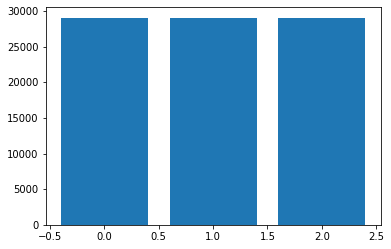

In [ ]:
#Viewing the distribution of the training data after using SMOTE
from collections import Counter
# summarize distribution
counter = Counter(Y_train)
for k,v in counter.items():
  per = v / len(Y_train) * 100
  print ('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter .keys(),counter.values())

As we can see the dimension for training set is (87219, 60) i.e 87219 rows and 60 columns

After using SMOTE to balance the training data each class n=29073


#Applying PCA to the features
PCA is used to reduce the number of variables/features(dimensions) in a dataset. It introduces new variables in the dataset in the form of principal components.

In [ ]:
#importing the libraries
from sklearn.decomposition import PCA
#we want to capture 90% variation in the feature space
pca=PCA(0.90)
#fitting PCA on the X_train
pca.fit(X_train)
#applying PCA on X_training and X_test
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

In [ ]:
X_train.shape

(87219, 21)

In [ ]:
X_test.shape

(20871, 21)

In [ ]:
(X_train < 0).sum().sum()

969273

As we can see the dimension for training set is reduced to(48699, 22) i.e 48699 rows and 22 columns

And for test data is reduced to (20871, 22) i.e, 20871 rows and 22 columns


# Supervised Learning

## Naive Bayes as Baseline model _ GNB






Gaussian Naive Bayes Performance:
Train Acurracy: 0.38702576273518385
Training error is: 0.6129742372648161
Test Acurracy: 0.3225049111206938
Test error is: 0.6774950888793062
              precision    recall  f1-score   support

           0       0.65      0.34      0.44     12540
           1       0.10      0.53      0.16      1832
           2       0.35      0.24      0.28      6499

    accuracy                           0.32     20871
   macro avg       0.36      0.37      0.30     20871
weighted avg       0.51      0.32      0.37     20871



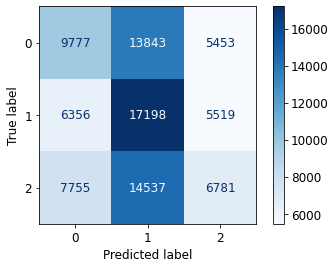

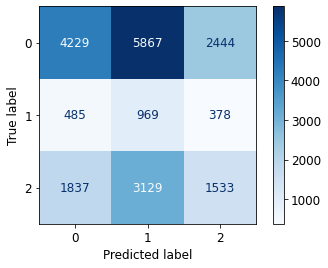

In [ ]:
#fitting the model
gnb = GaussianNB() # (default) var_smoothing = 1e-9
gnb.fit(X_train, Y_train)
nb_pred_test = gnb.predict(X_test)
nb_pred_train = gnb.predict(X_train)
train_acc = accuracy_score(Y_train, nb_pred_train)
test_acc = accuracy_score(Y_test, nb_pred_test)
test_err = 1-test_acc
train_err = 1 - train_acc
#Results
print('Gaussian Naive Bayes Performance:')
print('Train Acurracy:', train_acc)
print('Training error is:', train_err)
#confusion matrix for training data
c_xtrain=plot_confusion_matrix(gnb, X_train, Y_train ,display_labels = None, cmap=plt.cm.Blues)
print('Test Acurracy:', test_acc)
print("Test error is:",test_err)
print(classification_report(Y_test, nb_pred_test))
#confusion_matrix for the test data
c_xtest = plot_confusion_matrix(gnb, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)


Accuracy is of Multinomial Naive Bayes Classifier 32.250491112069376


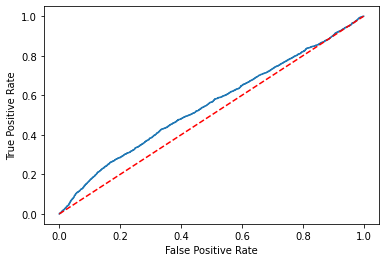

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
# all the same up until now

proba = gnb.predict_proba(X_test)
print("Accuracy is of Multinomial Naive Bayes Classifier", accuracy_score(Y_test, nb_pred_test) * 100)

#for i in range(1):
y_test_bin = np.int32(Y_test == 1)
y_score = proba[:,1]
fpr, tpr, _ = roc_curve(y_test_bin, y_score, pos_label=1)
#plt.subplot(2,2,i+1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1],'r--')

## Tuning the Hyperparameters for Naive Bayes
-tuning the hyperparameters is necessary as it impacts the performance of the model
-we are going to use GridSearchCV for implementing hyperparameters. It brute force all combinations


In [ ]:
#Defining the grid search parameters
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=20)}
gnb = GaussianNB()
#using gridsearchcv with cross validation=5
gnb_1 = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, cv = 5, scoring = 'recall', refit = True, verbose = 3)
# Fitting the model
gnb_1.fit(X_train, Y_train)
#printing the best parameters
print("The best parameters are: ",gnb_1.best_params_)

#Finding the best estimator
best_gnb_estimator = gnb_1.best_estimator_
#Finding the accuracy of the model
best_gnb_acc_score = best_gnb_estimator.score(X_train,Y_train)
print("Best estimator: ",best_gnb_estimator)
print('Accuracy of the model, after hyperparameter tuning:  %.4f' % (best_gnb_acc_score*100))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...................var_smoothing=1.0;, score=nan total time=   0.1s
[CV 2/5] END ...................var_smoothing=1.0;, score=nan total time=   0.1s
[CV 3/5] END ...................var_smoothing=1.0;, score=nan total time=   0.1s
[CV 4/5] END ...................var_smoothing=1.0;, score=nan total time=   0.1s
[CV 5/5] END ...................var_smoothing=1.0;, score=nan total time=   0.1s
[CV 1/5] END ....var_smoothing=0.3359818286283782;, score=nan total time=   0.1s
[CV 2/5] END ....var_smoothing=0.3359818286283782;, score=nan total time=   0.1s
[CV 3/5] END ....var_smoothing=0.3359818286283782;, score=nan total time=   0.1s
[CV 4/5] END ....var_smoothing=0.3359818286283782;, score=nan total time=   0.1s
[CV 5/5] END ....var_smoothing=0.3359818286283782;, score=nan total time=   0.1s
[CV 1/5] END ...var_smoothing=0.11288378916846892;, score=nan total time=   0.1s
[CV 2/5] END ...var_smoothing=0.112883789168468

              precision    recall  f1-score   support

           0       0.67      0.21      0.32     12540
           1       0.10      0.75      0.17      1832
           2       0.35      0.14      0.20      6499

    accuracy                           0.24     20871
   macro avg       0.37      0.37      0.23     20871
weighted avg       0.52      0.24      0.27     20871



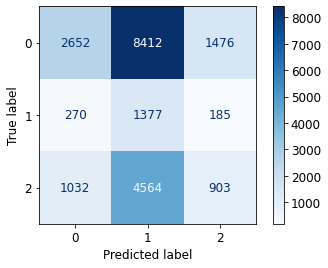

In [ ]:
#Model assesment metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#Calculating precision, Recall and, F1-Score
y_pred_1 = best_gnb_estimator.predict(X_test)
print(classification_report(Y_test, y_pred_1))
#confusion_matrix for the testing
disp = plot_confusion_matrix(best_gnb_estimator, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)


Accuracy is of Gaussian Naive Bayes Classifier 23.63087537731781


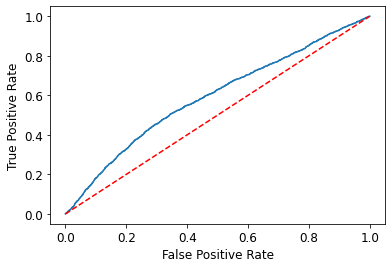

In [ ]:
# New code for ROC #

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
# all the same up until now
nb_pred_test_2 = gnb_1.predict(X_test)
proba = gnb_1.predict_proba(X_test)
print("Accuracy is of Gaussian Naive Bayes Classifier", accuracy_score(Y_test, nb_pred_test_2) * 100)

#for i in range(1):
y_test_bin = np.int32(Y_test == 1)
y_score = proba[:,1]
fpr1, tpr1, _ = roc_curve(y_test_bin, y_score, pos_label=1)
#plt.subplot(2,2,i+1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1],'r--')

## Logistic Regression

In [ ]:
lr_model = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
lr_model.fit(X_train, Y_train)
lr_pred_test = lr_model.predict(X_test)
lr_pred_train = lr_model.predict(X_train)
lr_train_acc = accuracy_score(Y_train, lr_pred_train)
lr_test_acc = accuracy_score(Y_test, lr_pred_test)
lr_test_err = 1 - lr_test_acc
lr_train_err = 1 - lr_train_acc

Text(0, 0.5, 'Frequency')

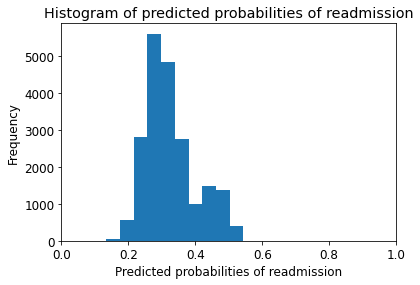

In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

lr_model.predict_proba(X_test)[0:10, 1]

# store the predicted probabilities for class 1 - Probability of readmission

y_pred1 = lr_model.predict_proba(X_test)[:, 1]
# plot histogram of predicted probabilities
# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of readmission')


# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of readmission')
plt.ylabel('Frequency')

Logistic Regression Performance:
Training accuracy is: 0.40391428473153784
Training error is: 0.5960857152684622
Training accuracy is: 0.41080925686359065
Test error is: 0.5891907431364094
              precision    recall  f1-score   support

           0       0.66      0.40      0.50     12540
           1       0.13      0.39      0.20      1832
           2       0.36      0.44      0.40      6499

    accuracy                           0.41     20871
   macro avg       0.38      0.41      0.36     20871
weighted avg       0.52      0.41      0.44     20871



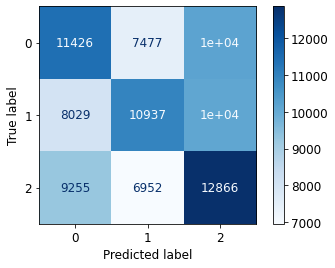

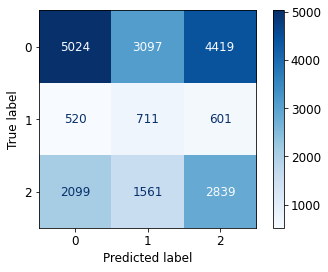

In [ ]:
#Results
#confusion_matrix = confusion_matrix(Y_test, lr_pred_test)
#print(confusion_matrix)

print('Logistic Regression Performance:')
print('Training accuracy is:', lr_train_acc)
print('Training error is:', lr_train_err)
#confusion_matrix for the training data
c_XtrainLogistic = plot_confusion_matrix(lr_model, X_train, Y_train ,display_labels=None, cmap=plt.cm.Blues)
print('Training accuracy is:', lr_test_acc)
print('Test error is:',lr_test_err)
print(classification_report(Y_test, lr_pred_test))
#confusion_matrix for the test data
c_XtestLogistic = plot_confusion_matrix(lr_model, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)

Accuracy is of lr Classifier 41.080925686359066


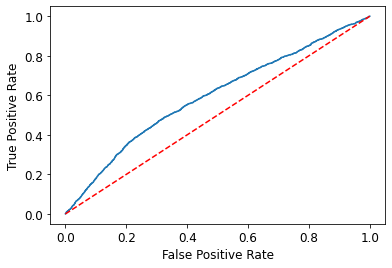

In [ ]:
# New code for ROC #

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
# all the same up until now
proba = lr_model.predict_proba(X_test)
print("Accuracy is of lr Classifier", accuracy_score(Y_test, lr_pred_test) * 100)

#for i in range(1):
y_test_bin = np.int32(Y_test == 1)
y_score = proba[:,1]
fpr, tpr, _ = roc_curve(y_test_bin, y_score, pos_label=1)
#plt.subplot(2,2,i+1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1],'r--')

## Tuning the Hyperparameters for Logistic Regression
-tuning the hyperparameters is necessary as it impacts the performance of the model
-we are going to use GridSearchCV for implementing hyperparameters. It brute force all combinations


In [ ]:
#Defining the grid search parameters
param_grid = {'solver':['liblinear','newton-cg', 'lbfgs'],
              'C': [0.1,0.2,0.4,0.8,1.0]}
LogReg = LogisticRegression(max_iter = 1000)
#using gridsearchcv with cross validation=5
LogReg_1 = GridSearchCV(LogReg, param_grid, cv = 5, scoring = 'recall', refit = True, verbose = 3)
# Fitting the model
LogReg_1.fit(X_train, Y_train)
#Finding the best estimator
print('The best parameters: ', LogReg_1.best_params_)
#Accuracy for best estimator
bestlogistic_estimator = LogReg_1.best_estimator_
#Finding the accuracy of the model
best_logistic_acc_score = bestlogistic_estimator.score(X_train,Y_train)
print('Accuracy of the model after hyperparameter tuning is:  %.4f' % (best_logistic_acc_score*100))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .............C=0.1, solver=liblinear;, score=nan total time=   0.4s
[CV 2/5] END .............C=0.1, solver=liblinear;, score=nan total time=   0.4s
[CV 3/5] END .............C=0.1, solver=liblinear;, score=nan total time=   0.4s
[CV 4/5] END .............C=0.1, solver=liblinear;, score=nan total time=   0.5s
[CV 5/5] END .............C=0.1, solver=liblinear;, score=nan total time=   0.5s
[CV 1/5] END .............C=0.1, solver=newton-cg;, score=nan total time=   1.9s
[CV 2/5] END .............C=0.1, solver=newton-cg;, score=nan total time=   2.1s
[CV 3/5] END .............C=0.1, solver=newton-cg;, score=nan total time=   3.2s
[CV 4/5] END .............C=0.1, solver=newton-cg;, score=nan total time=   6.7s
[CV 5/5] END .............C=0.1, solver=newton-cg;, score=nan total time=   1.8s
[CV 1/5] END .................C=0.1, solver=lbfgs;, score=nan total time=   0.6s
[CV 2/5] END .................C=0.1, solver=lbfg

              precision    recall  f1-score   support

           0       0.66      0.40      0.50     12540
           1       0.13      0.39      0.20      1832
           2       0.36      0.44      0.40      6499

    accuracy                           0.41     20871
   macro avg       0.38      0.41      0.36     20871
weighted avg       0.52      0.41      0.44     20871



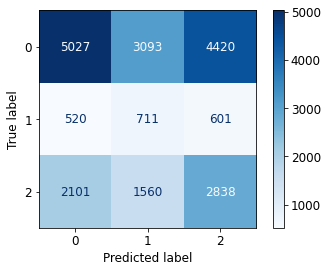

In [ ]:
#Calculating precision, Recall and, F1-Score
y_pred_lr1 = LogReg_1.predict(X_test)
print(classification_report(Y_test, y_pred_lr1))
#confusion_matrix for the testing
disp = plot_confusion_matrix(LogReg_1, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)

Accuracy is of lr Classifier 41.09050836088352


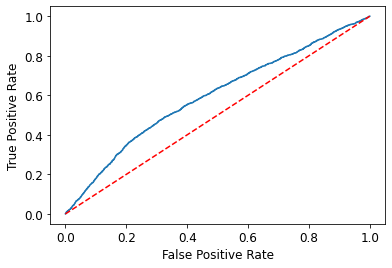

In [ ]:
# New code for ROC #

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
# all the same up until now
lr_pred_test_2 = bestlogistic_estimator.predict(X_test)
proba = bestlogistic_estimator.predict_proba(X_test)
print("Accuracy is of lr Classifier", accuracy_score(Y_test, lr_pred_test_2) * 100)

#for i in range(1):
y_test_bin = np.int32(Y_test == 1)
y_score = proba[:,1]
fpr2, tpr2, _ = roc_curve(y_test_bin, y_score, pos_label=1)
#plt.subplot(2,2,i+1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1],'r--')

## K nearest neighbors Model(KNN)

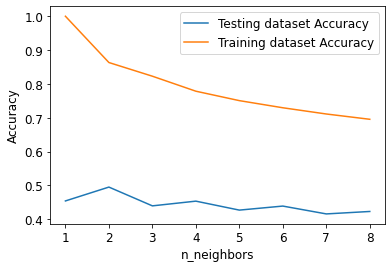

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt


neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# We can see the highest trainig accuracy is around k=4, so we are choosing k=4 to training out model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)

knn_train_acc = accuracy_score(Y_train, knn_pred_train)
knn_test_acc = accuracy_score(Y_test, knn_pred_test)
knn_test_err = 1 - knn_test_acc
knn_train_err = 1 - knn_train_acc

In [ ]:
print(knn_test_acc)

0.45330841837956976


KNN Performance:
Training accuracy is: 0.7783510473635332
Training error is: 0.22164895263646678
Training accuracy is: 0.45330841837956976
Test error is: 0.5466915816204303
              precision    recall  f1-score   support

           0       0.62      0.58      0.60     12540
           1       0.10      0.20      0.13      1832
           2       0.34      0.28      0.31      6499

    accuracy                           0.45     20871
   macro avg       0.35      0.35      0.35     20871
weighted avg       0.49      0.45      0.47     20871



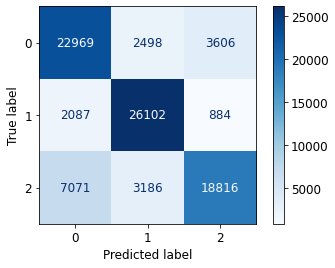

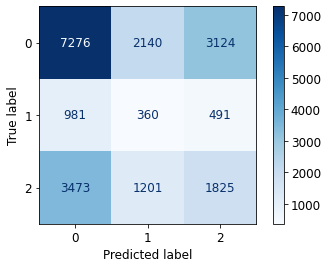

In [ ]:
print('KNN Performance:')
print('Training accuracy is:', knn_train_acc)
print('Training error is:', knn_train_err)
#confusion_matrix for the training data
c_Xtrain_KNN = plot_confusion_matrix(knn, X_train, Y_train ,display_labels=None, cmap=plt.cm.Blues)
print('Training accuracy is:', knn_test_acc)
print('Test error is:',knn_test_err)
#confusion_matrix for the test data
c_Xtest_KNN = plot_confusion_matrix(knn, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)
print(classification_report(Y_test, knn_pred_test))

Accuracy is of lr Classifier 45.330841837956974


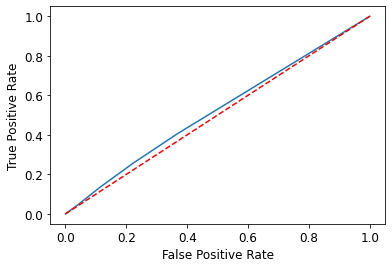

In [ ]:
# New code for ROC #

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
# all the same up until now

proba = knn.predict_proba(X_test)
print("Accuracy is of lr Classifier", accuracy_score(Y_test, knn_pred_test) * 100)

#for i in range(1):
y_test_bin = np.int32(Y_test == 1)
y_score = proba[:,1]
fpr, tpr, _ = roc_curve(y_test_bin, y_score, pos_label=1)
#plt.subplot(2,2,i+1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1],'r--')

## Parameters tuning for KNN

In [ ]:
#Method 2 for KNN -parameter tuning
param_grid = {'n_neighbors' : [2,3,4,5,6,7,8,9,10]}
knn_2 = KNeighborsClassifier()

#using gridsearchcv with cross validation=3
knn_grid1 = GridSearchCV(knn_2, param_grid, cv = 3, scoring = 'recall', refit = True, verbose = 3)

# Fitting the model
knn_grid1.fit(X_train, Y_train)

#Finding the best estimator
print('The best parameters: ', knn_grid1.best_params_)

#Accuracy for best estimator
bestknn = knn_grid1.best_estimator_
best_knn_acc = bestknn.score(X_train,Y_train)
print('Training Accuracy of the KNN model with hyperparameter tuning:  %.4f' % (best_knn_acc*100))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .......................n_neighbors=2;, score=nan total time=  17.7s
[CV 2/3] END .......................n_neighbors=2;, score=nan total time=  17.2s
[CV 3/3] END .......................n_neighbors=2;, score=nan total time=  17.3s
[CV 1/3] END .......................n_neighbors=3;, score=nan total time=  20.4s
[CV 2/3] END .......................n_neighbors=3;, score=nan total time=  20.0s
[CV 3/3] END .......................n_neighbors=3;, score=nan total time=  20.1s
[CV 1/3] END .......................n_neighbors=4;, score=nan total time=  27.2s
[CV 2/3] END .......................n_neighbors=4;, score=nan total time=  26.4s
[CV 3/3] END .......................n_neighbors=4;, score=nan total time=  25.9s
[CV 1/3] END .......................n_neighbors=5;, score=nan total time=  27.0s
[CV 2/3] END .......................n_neighbors=5;, score=nan total time=  26.3s
[CV 3/3] END .......................n_neighbors=5

Accuracy is of lr Classifier 49.489722581572515


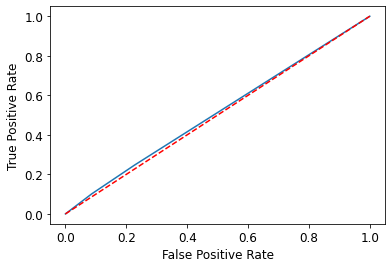

In [ ]:
# New code for ROC #

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
# all the same up until now
knn_pred_test_2 = bestknn.predict(X_test)
proba = bestknn.predict_proba(X_test)
print("Accuracy is of lr Classifier", accuracy_score(Y_test, knn_pred_test_2) * 100)

#for i in range(1):
y_test_bin = np.int32(Y_test == 1)
y_score = proba[:,1]
fpr3, tpr3, _ = roc_curve(y_test_bin, y_score, pos_label=1)
#plt.subplot(2,2,i+1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1],'r--')

              precision    recall  f1-score   support

           0       0.61      0.70      0.65     12540
           1       0.10      0.15      0.12      1832
           2       0.34      0.20      0.25      6499

    accuracy                           0.49     20871
   macro avg       0.35      0.35      0.34     20871
weighted avg       0.48      0.49      0.48     20871



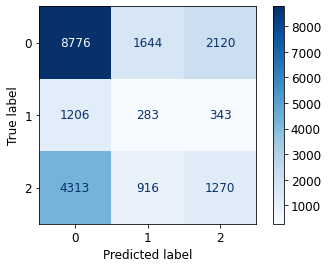

In [ ]:
#Model assesment metrics for KNN
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#Calculating precision, Recall and, F1-Score
y_pred_knn = bestknn.predict(X_test)
print(classification_report(Y_test, y_pred_knn))
#confusion_matrix for the testing
disp = plot_confusion_matrix(bestknn, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)

## Support Vector Machine(SVM)

In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear', probability=True)
# fitting the model
svm_model.fit(X_train, Y_train)
svm_pred_test = svm_model.predict(X_test)
svm_pred_train = svm_model.predict(X_train)
svm_train_acc = accuracy_score(Y_train, svm_pred_train)
svm_test_acc = accuracy_score(Y_test, svm_pred_test)
svm_test_err = 1 - svm_test_acc
svm_train_err = 1 - svm_train_acc

SVM Performance:
Training Accuracy is: 0.4010823329779062
Training error is: 0.5989176670220938
Test Accuracy is: 0.41861913660102534
Test error is: 0.5813808633989747
              precision    recall  f1-score   support

           0       0.65      0.40      0.49     12540
           1       0.14      0.34      0.20      1832
           2       0.35      0.48      0.41      6499

    accuracy                           0.42     20871
   macro avg       0.38      0.41      0.37     20871
weighted avg       0.51      0.42      0.44     20871



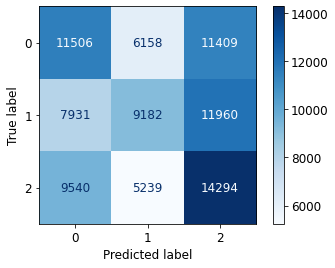

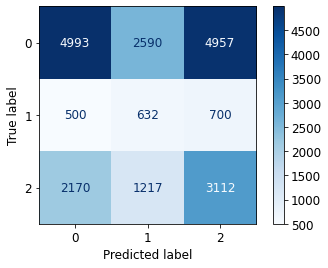

In [ ]:
#Results
print('SVM Performance:')
print('Training Accuracy is:', svm_train_acc)
print('Training error is:', svm_train_err)
#confusion_matrix for the training data
c_XtrainLogistic = plot_confusion_matrix(svm_model, X_train, Y_train ,display_labels=None, cmap=plt.cm.Blues)
print('Test Accuracy is:', svm_test_acc)
print('Test error is:',svm_test_err)
print(classification_report(Y_test, svm_pred_test))
#confusion_matrix for the test data
c_XtestSVM = plot_confusion_matrix(svm_model, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)


Accuracy is of lr Classifier 41.86191366010254


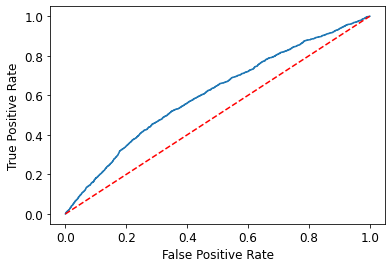

In [ ]:
# New code for ROC #

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
# all the same up until now

proba = svm_model.predict_proba(X_test)
print("Accuracy is of lr Classifier", accuracy_score(Y_test, svm_pred_test) * 100)

#for i in range(1):
y_test_bin = np.int32(Y_test == 1)
y_score = proba[:,1]
fpr, tpr, _ = roc_curve(y_test_bin, y_score, pos_label=1)
#plt.subplot(2,2,i+1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1],'r--')

In [ ]:
#from sklearn import svm
#svm_model_rbf = svm.SVC(kernel='rbf', probability=True)
#svm_model_rbf = svm.SVC(kernel='rbf', decision_function_shape='ovr', probability=True) #default
#svm_model_rbf = svm.SVC(kernel='rbf', decision_function_shape='ovo', probability=True)
# fitting the model
#svm_model_rbf.fit(X_train, Y_train)
#svm_pred_test_rbf = svm_model_rbf.predict(X_test)
#svm_pred_train = svm_model_rbf.predict(X_train)
#svm_train_acc_rbf = accuracy_score(Y_train, svm_pred_train)
#svm_test_acc_rbf = accuracy_score(Y_test, svm_pred_test)
#svm_test_err_rbf = 1 - svm_test_acc_rbf
#svm_train_err = 1 - svm_train_acc_rbf

In [ ]:
from sklearn import svm
#svm_model_rbf = svm.SVC(kernel='rbf', probability=True)
#svm_model_rbf = svm.SVC(kernel='rbf', decision_function_shape='ovr', probability=True)
svm_model_rbf = svm.SVC(kernel='rbf', decision_function_shape='ovo', probability=True) # the same as para tuning
# fitting the model
svm_model_rbf.fit(X_train, Y_train)
svm_pred_test_rbf = svm_model_rbf.predict(X_test)
svm_pred_train = svm_model_rbf.predict(X_train)
svm_train_acc_rbf = accuracy_score(Y_train, svm_pred_train)
svm_test_acc_rbf = accuracy_score(Y_test, svm_pred_test)
svm_test_err_rbf = 1 - svm_test_acc_rbf
svm_train_err = 1 - svm_train_acc_rbf

SVM Performance:
Training Accuracy is: 0.4010823329779062
Training error is: 0.4402939726435754
Test Accuracy is: 0.41861913660102534
Test error is: 0.5813808633989747
              precision    recall  f1-score   support

           0       0.65      0.40      0.49     12540
           1       0.14      0.34      0.20      1832
           2       0.35      0.48      0.41      6499

    accuracy                           0.42     20871
   macro avg       0.38      0.41      0.37     20871
weighted avg       0.51      0.42      0.44     20871



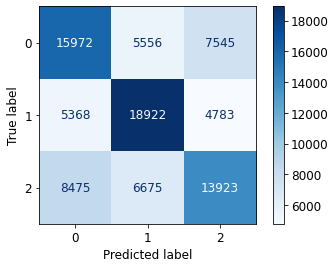

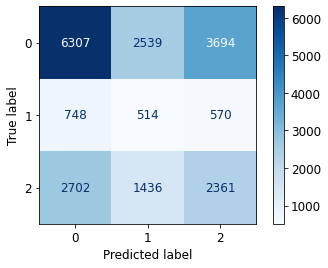

In [ ]:
#Results
#print('SVM Performance:')
#print('Training Accuracy is:', svm_test_acc_rbf)
#print('Training error is:', svm_test_err_rbf)
#confusion_matrix for the training data
#c_XtrainLogistic = plot_confusion_matrix(svm_model_rbf, X_train, Y_train ,display_labels=None, cmap=plt.cm.Blues)
#print('Test Accuracy is:', svm_test_acc_rbf)
#print('Test error is:',svm_test_err_rbf)
#print(classification_report(Y_test, svm_pred_test_rbf))
#confusion_matrix for the test data
#c_XtestSVM = plot_confusion_matrix(svm_model_rbf, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)


SVM Performance:
Training Accuracy is: 0.5597060273564246
Training error is: 0.4402939726435754
Test Accuracy is: 0.41861913660102534
Test error is: 0.5813808633989747
              precision    recall  f1-score   support

           0       0.65      0.50      0.57     12540
           1       0.11      0.28      0.16      1832
           2       0.36      0.36      0.36      6499

    accuracy                           0.44     20871
   macro avg       0.37      0.38      0.36     20871
weighted avg       0.51      0.44      0.47     20871



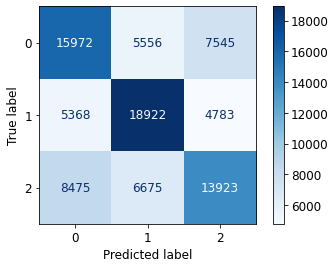

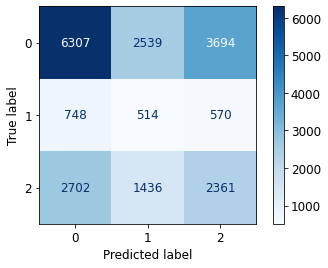

In [ ]:
#Results
print('SVM Performance:')
print('Training Accuracy is:', svm_train_acc_rbf)
print('Training error is:', svm_train_err)
#confusion_matrix for the training data
c_XtrainLogistic = plot_confusion_matrix(svm_model_rbf, X_train, Y_train ,display_labels=None, cmap=plt.cm.Blues)
print('Test Accuracy is:', svm_test_acc_rbf)
print('Test error is:',svm_test_err_rbf)
print(classification_report(Y_test, svm_pred_test_rbf))
#confusion_matrix for the test data
c_XtestSVM = plot_confusion_matrix(svm_model_rbf, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)


Accuracy is of lr Classifier 43.99405874179483


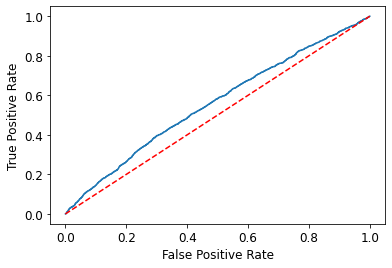

In [ ]:
# New code for ROC #

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
# all the same up until now

proba = svm_model_rbf.predict_proba(X_test)
print("Accuracy is of lr Classifier", accuracy_score(Y_test, svm_pred_test_rbf) * 100)

#for i in range(1):
y_test_bin = np.int32(Y_test == 1)
y_score = proba[:,1]
fpr, tpr, _ = roc_curve(y_test_bin, y_score, pos_label=1)
#plt.subplot(2,2,i+1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1],'r--')

##Hyper parameter tuning for SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#Defining the grid search parameters
#param_grid = {'gamma': [1e-5, 1e-7],
#                     'C': [0.001, 0.01]}
#SVM = svm.SVC(kernel = 'rbf', decision_function_shape='ovo', probability=True)
#using gridsearchcv with cross validation=3
#SVM_1 = GridSearchCV(SVM, param_grid, cv = 3, scoring = 'recall', refit = True, verbose = 3)
# Fitting the model
#SVM_1.fit(X_train, Y_train)

#Finding the best estimator
#print('The best parameters: ', SVM_1.best_params_)

#Accuracy for best estimator
#bestSVM_estimator = SVM_1.best_estimator_
#Finding the accuracy of the model
#best_svm_acc_score = bestSVM_estimator.score(X_train,Y_train)
#print('Accuracy of the SVM model after hyperparameter tuning is:  %.4f' % (best_svm_acc_score*100))



# [output]
# [CV 3/3] END .................C=0.01, gamma=1e-07;, score=nan total time=28.5min
# The best parameters:  {'C': 0.001, 'gamma': 1e-05}
# Accuracy of the SVM model after hyperparameter tuning is:  39.7333

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ................C=0.001, gamma=1e-05;, score=nan total time=27.6min
[CV 2/3] END ................C=0.001, gamma=1e-05;, score=nan total time=27.8min
[CV 3/3] END ................C=0.001, gamma=1e-05;, score=nan total time=29.2min
[CV 1/3] END ................C=0.001, gamma=1e-07;, score=nan total time=28.0min
[CV 2/3] END ................C=0.001, gamma=1e-07;, score=nan total time=28.1min
[CV 3/3] END ................C=0.001, gamma=1e-07;, score=nan total time=28.4min
[CV 1/3] END .................C=0.01, gamma=1e-05;, score=nan total time=27.9min
[CV 2/3] END .................C=0.01, gamma=1e-05;, score=nan total time=28.0min
[CV 3/3] END .................C=0.01, gamma=1e-05;, score=nan total time=28.1min
[CV 1/3] END .................C=0.01, gamma=1e-07;, score=nan total time=28.1min
[CV 2/3] END .................C=0.01, gamma=1e-07;, score=nan total time=28.4min
[CV 3/3] END .................C=0.01, gamma=1e-07

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#Defining the grid search parameters
param_grid = {'gamma': [1e-5,'scale'],
                     'C': [0.001, 1.0]} #base on last result
SVM = svm.SVC(kernel = 'rbf', decision_function_shape='ovo', probability=True)
#using gridsearchcv with cross validation=3
SVM_2 = GridSearchCV(SVM, param_grid, cv = 3, scoring = 'recall', refit = True, verbose = 3)
# Fitting the model
SVM_2.fit(X_train, Y_train)

#Finding the best estimator
print('The best parameters: ', SVM_2.best_params_)

#Accuracy for best estimator
bestSVM_estimator = SVM_2.best_estimator_
#Finding the accuracy of the model
best_svm_acc_score = bestSVM_estimator.score(X_train,Y_train)
print('Accuracy of the SVM model after hyperparameter tuning is:  %.4f' % (best_svm_acc_score*100))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ................C=0.001, gamma=1e-05;, score=nan total time=28.5min
[CV 2/3] END ................C=0.001, gamma=1e-05;, score=nan total time=27.9min
[CV 3/3] END ................C=0.001, gamma=1e-05;, score=nan total time=27.9min
[CV 1/3] END ................C=0.001, gamma=scale;, score=nan total time=28.3min
[CV 2/3] END ................C=0.001, gamma=scale;, score=nan total time=28.5min
[CV 3/3] END ................C=0.001, gamma=scale;, score=nan total time=28.6min
[CV 1/3] END ..................C=1.0, gamma=1e-05;, score=nan total time=28.1min
[CV 2/3] END ..................C=1.0, gamma=1e-05;, score=nan total time=28.3min
[CV 3/3] END ..................C=1.0, gamma=1e-05;, score=nan total time=28.3min
[CV 1/3] END ..................C=1.0, gamma=scale;, score=nan total time=25.4min
[CV 2/3] END ..................C=1.0, gamma=scale;, score=nan total time=26.3min
[CV 3/3] END ..................C=1.0, gamma=scale

              precision    recall  f1-score   support

           0       0.65      0.39      0.49     12540
           1       0.13      0.41      0.20      1832
           2       0.35      0.41      0.38      6499

    accuracy                           0.40     20871
   macro avg       0.38      0.40      0.35     20871
weighted avg       0.51      0.40      0.43     20871



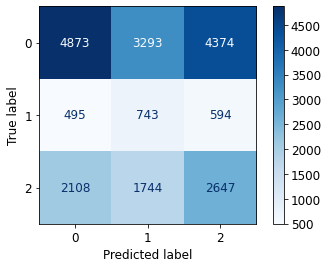

In [ ]:
#Model assesment metrics for SVM 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#Calculating precision, Recall and, F1-Score
#y_pred_svm = SVM_1.predict(X_test)
svm_pred_test_2 = bestSVM_estimator.predict(X_test)
print(classification_report(Y_test, y_pred_svm_2))
#confusion_matrix for the testing
disp = plot_confusion_matrix(bestSVM_estimator, X_test, Y_test ,display_labels=None, cmap=plt.cm.Blues)


Accuracy is of lr Classifier 39.590819797805565


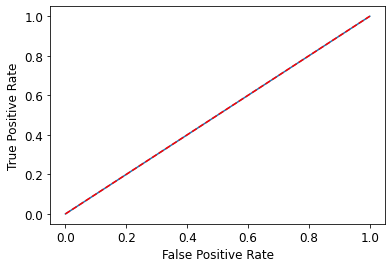

In [ ]:
# New code for ROC #

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
# all the same up until now

proba = bestSVM_estimator.predict_proba(X_test)
print("Accuracy is of lr Classifier", accuracy_score(Y_test, svm_pred_test_2) * 100)

#for i in range(1):
y_test_bin = np.int32(Y_test == 1)
y_score = proba[:,1]
fpr4, tpr4, _ = roc_curve(y_test_bin, y_score, pos_label=1)
#plt.subplot(2,2,i+1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot([0, 1], [0, 1],'r--')

#Model Comparisons

We will compare the accuracy for all the models before and after parameter tuning

## Before Tuning

In [ ]:
#Model Accuracy for Naive Bayes,Logistic regression,KNN,SVM
best_gnb_acc_score = accuracy_score(Y_test, nb_pred_test)
best_logistic_acc_score = accuracy_score(Y_test, lr_pred_test)
best_knn_acc = accuracy_score(Y_test, knn_pred_test)
best_svm_acc_score = accuracy_score(Y_test, svm_pred_test)

print('wo Tuning Model Accuracy')
print('Accuracy Naive Bayes Model: ', best_gnb_acc_score )
print('Accuracy Logistic Regression: ', best_logistic_acc_score )
print('Accuracy K Nearest Neighbors (KNN) Model: ', best_knn_acc )
print('Accuracy Support Vector Machines Model: ', best_svm_acc_score )

In [ ]:
# Plotting Model Accuracy for Naive Bayes,Logistic regression,KNN,SVM
plt.figure(figsize=(12, 7))
x_axis =['Naive bayes','Logistic Regression','KNN','SVM']
y_axis =[best_gnb_acc_score,best_logistic_acc_score,best_knn_acc,best_svm_acc_score]
plt.bar(x_axis, y_axis, width=0.6)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')

## After Tuning

In [ ]:
#Model Accuracy for Naive Bayes,Logistic regression,KNN,SVM
best_gnb_acc_score_1 = accuracy_score(Y_test, nb_pred_test_2)
best_logistic_acc_score_1 = accuracy_score(Y_test, lr_pred_test_2)
best_knn_acc_score_1 = accuracy_score(Y_test, knn_pred_test_2)
best_svm_acc_score_1 = accuracy_score(Y_test, svm_pred_test_2)


print('Tuning Model Accuracy')
print('Accuracy Naive Bayes Model: ', best_gnb_acc_score_1)
print('Accuracy Logistic Regression: ', best_logistic_acc_score_1)
print('Accuracy K Nearest Neighbors (KNN) Model: ', best_knn_acc_score_1 )
print('Accuracy Support Vector Machines Model: ', best_svm_acc_score_1)

In [ ]:
# Plotting Model Accuracy for Naive Bayes,Logistic regression,KNN,SVM
plt.figure(figsize=(12, 7))
x_axis =['Naive bayes','Logistic Regression','KNN','SVM']
y_axis =[best_gnb_acc_score_1 ,best_logistic_acc_score_1 ,best_knn_acc_1 ,best_svm_acc_score_1]
plt.bar(x_axis, y_axis, width=0.6)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')

# Model Asessment

## After Tuning ROC

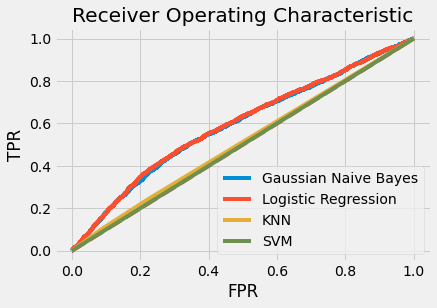

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "NB")
plt.plot(fpr2, tpr2, label= "LR")
plt.plot(fpr3, tpr3, label= "KNN")
plt.plot(fpr4, tpr4, label= "SVM")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()



#from google.colab import files
#plt.savefig("Tuning ROC.png")
#files.download("Tuning ROC.png")

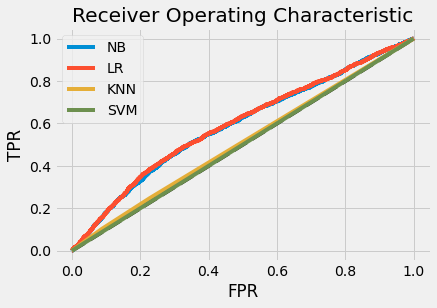

In [ ]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "NB")
plt.plot(fpr2, tpr2, label= "LR")
plt.plot(fpr3, tpr3, label= "KNN")
plt.plot(fpr4, tpr4, label= "SVM")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

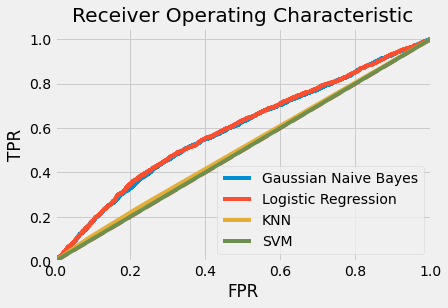

In [ ]:
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr1, tpr1, label= "Gaussian Naive Bayes")
plt.plot(fpr2, tpr2, label='Logistic Regression')
plt.plot(fpr3, tpr3, label='KNN')
plt.plot(fpr4, tpr4, label='SVM')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc ="lower right")
plt.title('Receiver Operating Characteristic')
plt.show()

In [ ]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Gaussian Naive Bayes(area = %0.2f)" % nb_roc_auc1)
plt.plot(fpr2, tpr2, label='Logistic Regression after hyperparamter tuning (area = %0.2f)' % nb_roc_auc_log)
plt.plot(fpr3, tpr3, label='KNN after hyperparamter tuning (area = %0.2f)' % nb_roc_auc_knn)

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [ ]:
#plot Precision-Recall curve and display average precision-recall score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

disp = plot_precision_recall_curve(mnb, X_test, Y_test) #display Precision-Recall curve for svm_classifier
average_precision = average_precision_score(Y_test, NB_prediction)
print('Average precision-recall score for NB_classifier: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(lr_model, X_test, Y_test) #display Precision-Recall curve for nb_classifier
average_precision = average_precision_score(Y_test, prediction)
print('Average precision-recall score for LR_classifier: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(knn, X_test, Y_test) #display Precision-Recall curve for nb_classifier
average_precision = average_precision_score(Y_test, knn_pred_test)
print('Average precision-recall score for KNN_classifier: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clf, X_test, Y_test) #display Precision-Recall curve for nb_classifier
average_precision = average_precision_score(Y_test, y_pred_svm)
print('Average precision-recall score for SVM_classifier: {0:0.2f}'.format(
      average_precision))

# Unsupervised Learning

## PCA

In [ ]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

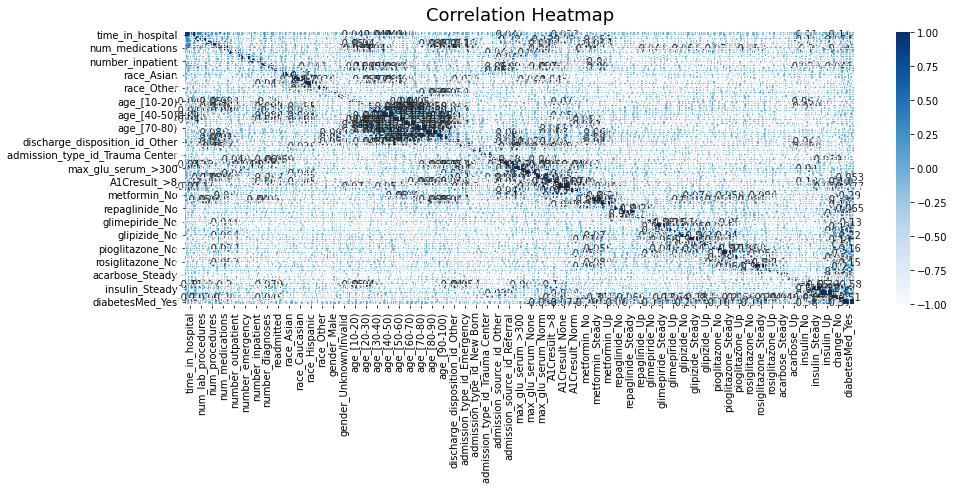

In [ ]:
#visualizing the correlation between different variables
plt.figure(figsize=(15, 5))
heatmap = sns.heatmap(medical_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.14523108, 0.09534117])

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
fig = px.scatter(X_pca, x=0, y=1, color = medical_df['readmitted'])
fig.show()

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    X_pca, x=0, y=1, z=2, color=medical_df['readmitted'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

## K-means (expected 2 seperated clusters)

In [ ]:
!pip install --upgrade kneed

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_features= scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=42)

### Elbow Method

#### method 1

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_features)
    distortions.append(kmeanModel.inertia_)

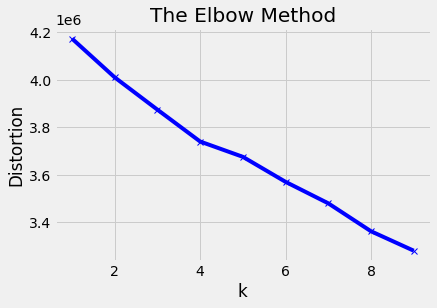

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

#### method 2

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

In [ ]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

5

### silhouette coefficients

In [ ]:
 # A list holds the silhouette coefficients for each k
silhouette_coefficients = []

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,}
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

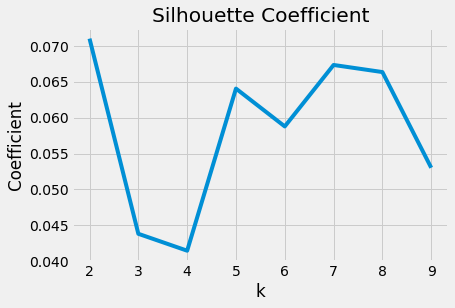

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("k")
plt.ylabel("Coefficient")
plt.title('Silhouette Coefficient')
plt.show()

### Davies-Bouldin Index
- find the lowest number

In [ ]:
from sklearn.metrics import davies_bouldin_score
results = {}
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    results.update({i: db_index})

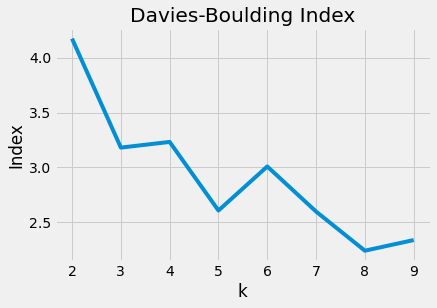

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("k")
plt.ylabel("Index")
plt.title('Davies-Boulding Index')
plt.show()